# Hello :)

With this notebook &#128211; you can check, if everything is set up for the incubator course **"Regularization in Image Reconstruction: From Model to Data Driven Methods"**!
We will go over everything in detail, but here's the list of packages we need:

* ```numpy```
* ```matplotlib```
* ```skimage``` (for installation: ```scikit-image```)
* ```torch```
* ```torchvision```
* ```ipywidgets```
* ```PyWavelets``` (for installation: ```pywavelets```)
* ```panel```

Let's check if everthing works.

## Importing ```numpy```

Let us first check if you can import ```numpy```, the basic package, which we will need for a lot of things. Just try to run the cell below :)

In [2]:
import numpy as np

If it worked, there should be a number displayed to the left side of the cell.

## Importing ```matplotlib```

Working with images, also means looking at images and graphs &#x1F4C8; Here, we need the ```matplotlib``` package. Let's test if it works, by running the following cell.

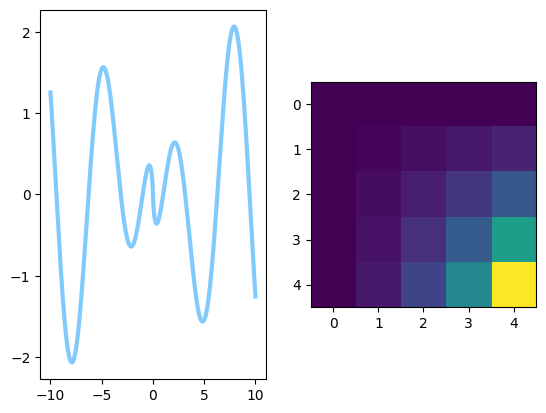

In [3]:
import matplotlib.pyplot as plt
x = np.linspace(-10,10, 200)
I = np.linspace(1,2,5)[:,None]**np.arange(5)

fig, ax = plt.subplots(1, 2, squeeze=False)
ax[0,0].plot(x, np.log(np.abs(x)) * np.sin(x), linewidth=3, color = 'xkcd:sky')
ax[0,1].imshow(I)
plt.show()

Did it work? Great!

## Importing ```skimage```

Next, we test a pretty handy package for image processing named ```skimage```. This allows us to display the most well-known test image in the community...or rather a modern version of it ;)

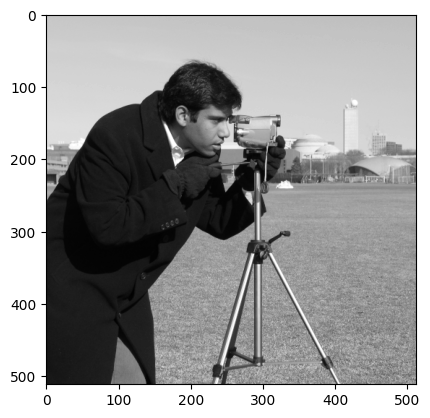

In [4]:
import skimage as ski
from skimage import data, img_as_float

I = img_as_float(data.camera())
plt.imshow(I, cmap='gray')
plt.show()


## Importing ```torch```

For data-driven approaches involving machine-learning and neural networks, the package ```torch``` will help us a lot. Let's see if everything works.

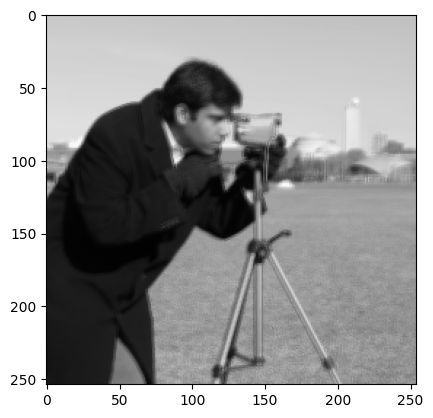

In [5]:
import torch
import torch.nn as nn
import torchvision

conv = nn.Conv2d(1, 1, 6, stride=2)
I_torch = torch.Tensor(I[None, None, :,:])
I_conv = conv(I_torch)

plt.imshow(I_conv.detach()[0,0,...], cmap='gray')
plt.show()

# Sliders

For visualization purposes it is very nice to have sliders :)
Here, we need the packages ```ipywidgets``` and ```IPython```.  ```IPython``` should usually be already installed within jupyter-lab.

You can install ```ipywidgets``` via ```pip install ipywidgets```.

Let's see if everything works :)


In [8]:
import ipywidgets as widgets
from ipywidgets import interact,interactive
from IPython.display import display

def zero_at_index(index):
    fig, axs = plt.subplots(1, 1, figsize=(20,5))
    J = I.copy()
    J[index, :] = 0
    J[:, index] = 0
    axs.imshow(J, cmap = 'gray');
    axs.tick_params(bottom = False, left = False)
    axs.set_xticks([])
    axs.set_yticks([])
    
    

slider = widgets.IntSlider(min = 0, max = I.shape[0]-1, step = 1, value = 0, continuous_update = True)
interactive_plot = interactive(zero_at_index, index = slider)
display(interactive_plot)


interactive(children=(IntSlider(value=0, description='index', max=511), Output()), _dom_classes=('widget-inter…

# Wavelets

For some examples we employ wavelets, which can be done with the ```PyWavelets``` package.

This package can be installed with ```pip install PyWavelets```. To test if it works we take the example direktly from the ```PyWavelets``` tutorial [https://pywavelets.readthedocs.io/en/latest/](https://pywavelets.readthedocs.io/en/latest/).

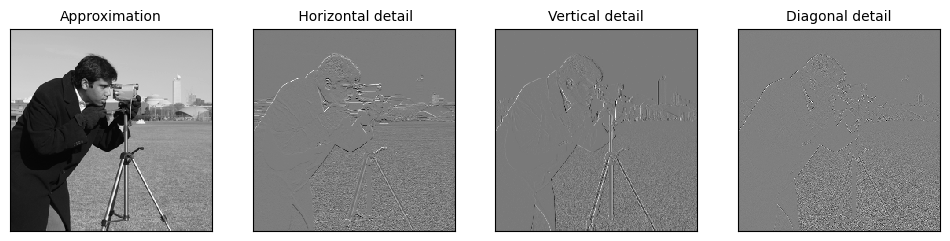

In [7]:
import pywt
titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']

coeffs2 = pywt.dwt2(I, 'bior1.3')
LL, (LH, HL, HH) = coeffs2
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])